# Coding Notebook for Phase 2 project
## John, Nick W, Nick K

# Project Intro
* stake_holders: House flippers
* business problem
* approach

In [2]:
#images?

## Importing of libraries

In [3]:
# these packages are used in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import geopy.distance as geo
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
%matplotlib inline

# Master Data File
From the kc-house-data we removed outliers for  <a href = www.gmail.com>link</a>
numerical column

In [4]:
#reading our cleaned and enhanced dataset
df = pd.read_csv('data/master_data_2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) #dropping an extra column artifact
df.head(2) #checking the layout of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,closest_water,group_C,group_E,group_N,group_NE,group_NW,group_S,group_SE,group_SW,group_W
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,0.680220,0,0,0,0,0,0,0,0,1
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,2.915718,0,0,0,0,1,0,0,0,0


## Exploring basics of our data

In [5]:
#converting to date time
df['date'] = pd.to_datetime(df['date'])

In [6]:
#checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21059 entries, 0 to 21058
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21059 non-null  int64         
 1   date            21059 non-null  datetime64[ns]
 2   price           21059 non-null  int64         
 3   bedrooms        21059 non-null  int64         
 4   bathrooms       21059 non-null  float64       
 5   sqft_living     21059 non-null  int64         
 6   sqft_lot        21059 non-null  int64         
 7   floors          21059 non-null  float64       
 8   waterfront      18748 non-null  object        
 9   view            20998 non-null  object        
 10  condition       21059 non-null  object        
 11  grade           21059 non-null  int64         
 12  sqft_above      21059 non-null  int64         
 13  sqft_basement   21059 non-null  object        
 14  yr_built        21059 non-null  int64         
 15  yr

In [7]:
#looking at our basic metrics mean, median, count etc
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,...,closest_water,group_C,group_E,group_N,group_NE,group_NW,group_S,group_SE,group_SW,group_W
count,2.105900e+04,2.105900e+04,21059.000000,21059.000000,21059.000000,2.105900e+04,21059.000000,21059.000000,21059.000000,21059.000000,...,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000
mean,4.621894e+09,5.392477e+05,3.375279,2.114072,2071.458521,1.195228e+04,1.495133,7.654969,1779.117479,1970.897621,...,5.405509,0.117242,0.000047,0.124555,0.000760,0.395223,0.014151,0.000047,0.061161,0.286813
std,2.874741e+09,3.679167e+05,0.926421,0.765593,905.122712,2.686565e+04,0.540648,1.164359,815.290130,29.465601,...,5.782292,0.321716,0.006891,0.330221,0.027554,0.488910,0.118115,0.006891,0.239632,0.452284
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.146050e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,7.000000,1190.000000,1951.000000,...,1.893041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.975400e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.540000e+03,1.500000,7.000000,1560.000000,1975.000000,...,3.383900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.345000e+09,6.430000e+05,4.000000,2.500000,2540.000000,1.040000e+04,2.000000,8.000000,2200.000000,1997.000000,...,6.037817,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,13.000000,8860.000000,2015.000000,...,57.486122,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#checking the median of our home prices
df.price.median()

450000.0

### Low hanging fruit metrics
given our business problem, we focus on sale price, we can see from above that the average home price is about 540K, and our median price is 450K

# Visulizing correlation and linearity
### Heatmap and pairplot

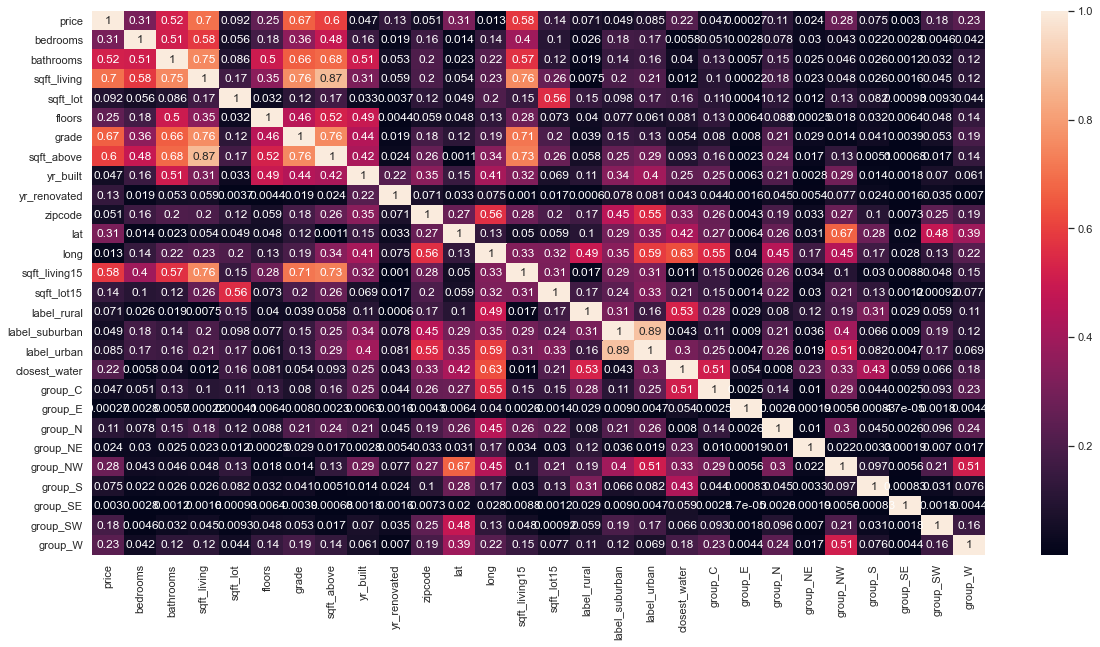

In [9]:
# Exploring correlation and linearity in our dataset with a HEATMAP
sns.set(rc = {'figure.figsize': (20,10)})
sns.heatmap(df.drop('id', axis=1).corr().abs(), annot=True);

above we see that bedrooms, bathrooms, sqft_living, floors, grade, sqft_above, lat, sqft_living15, and closest_water all have Pearson Correlation coefficients above 0.2, which makes them metrics of interest for our model. We've also decided to eliminate most of the regions, since they did not make a significant impact on the price.

### Exploring Linearity and normality of our data with a pairplot
we will reduce the metrics to those of interest and those that have been engineered

In [10]:
#creating a list of our metrics of interest
metrics_list = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'floors', 'grade', 'lat',
                'sqft_living15', 'label_rural', 'label_urban', 'label_suburban', 'closest_water',
                'group_NW','group_SW','group_W']

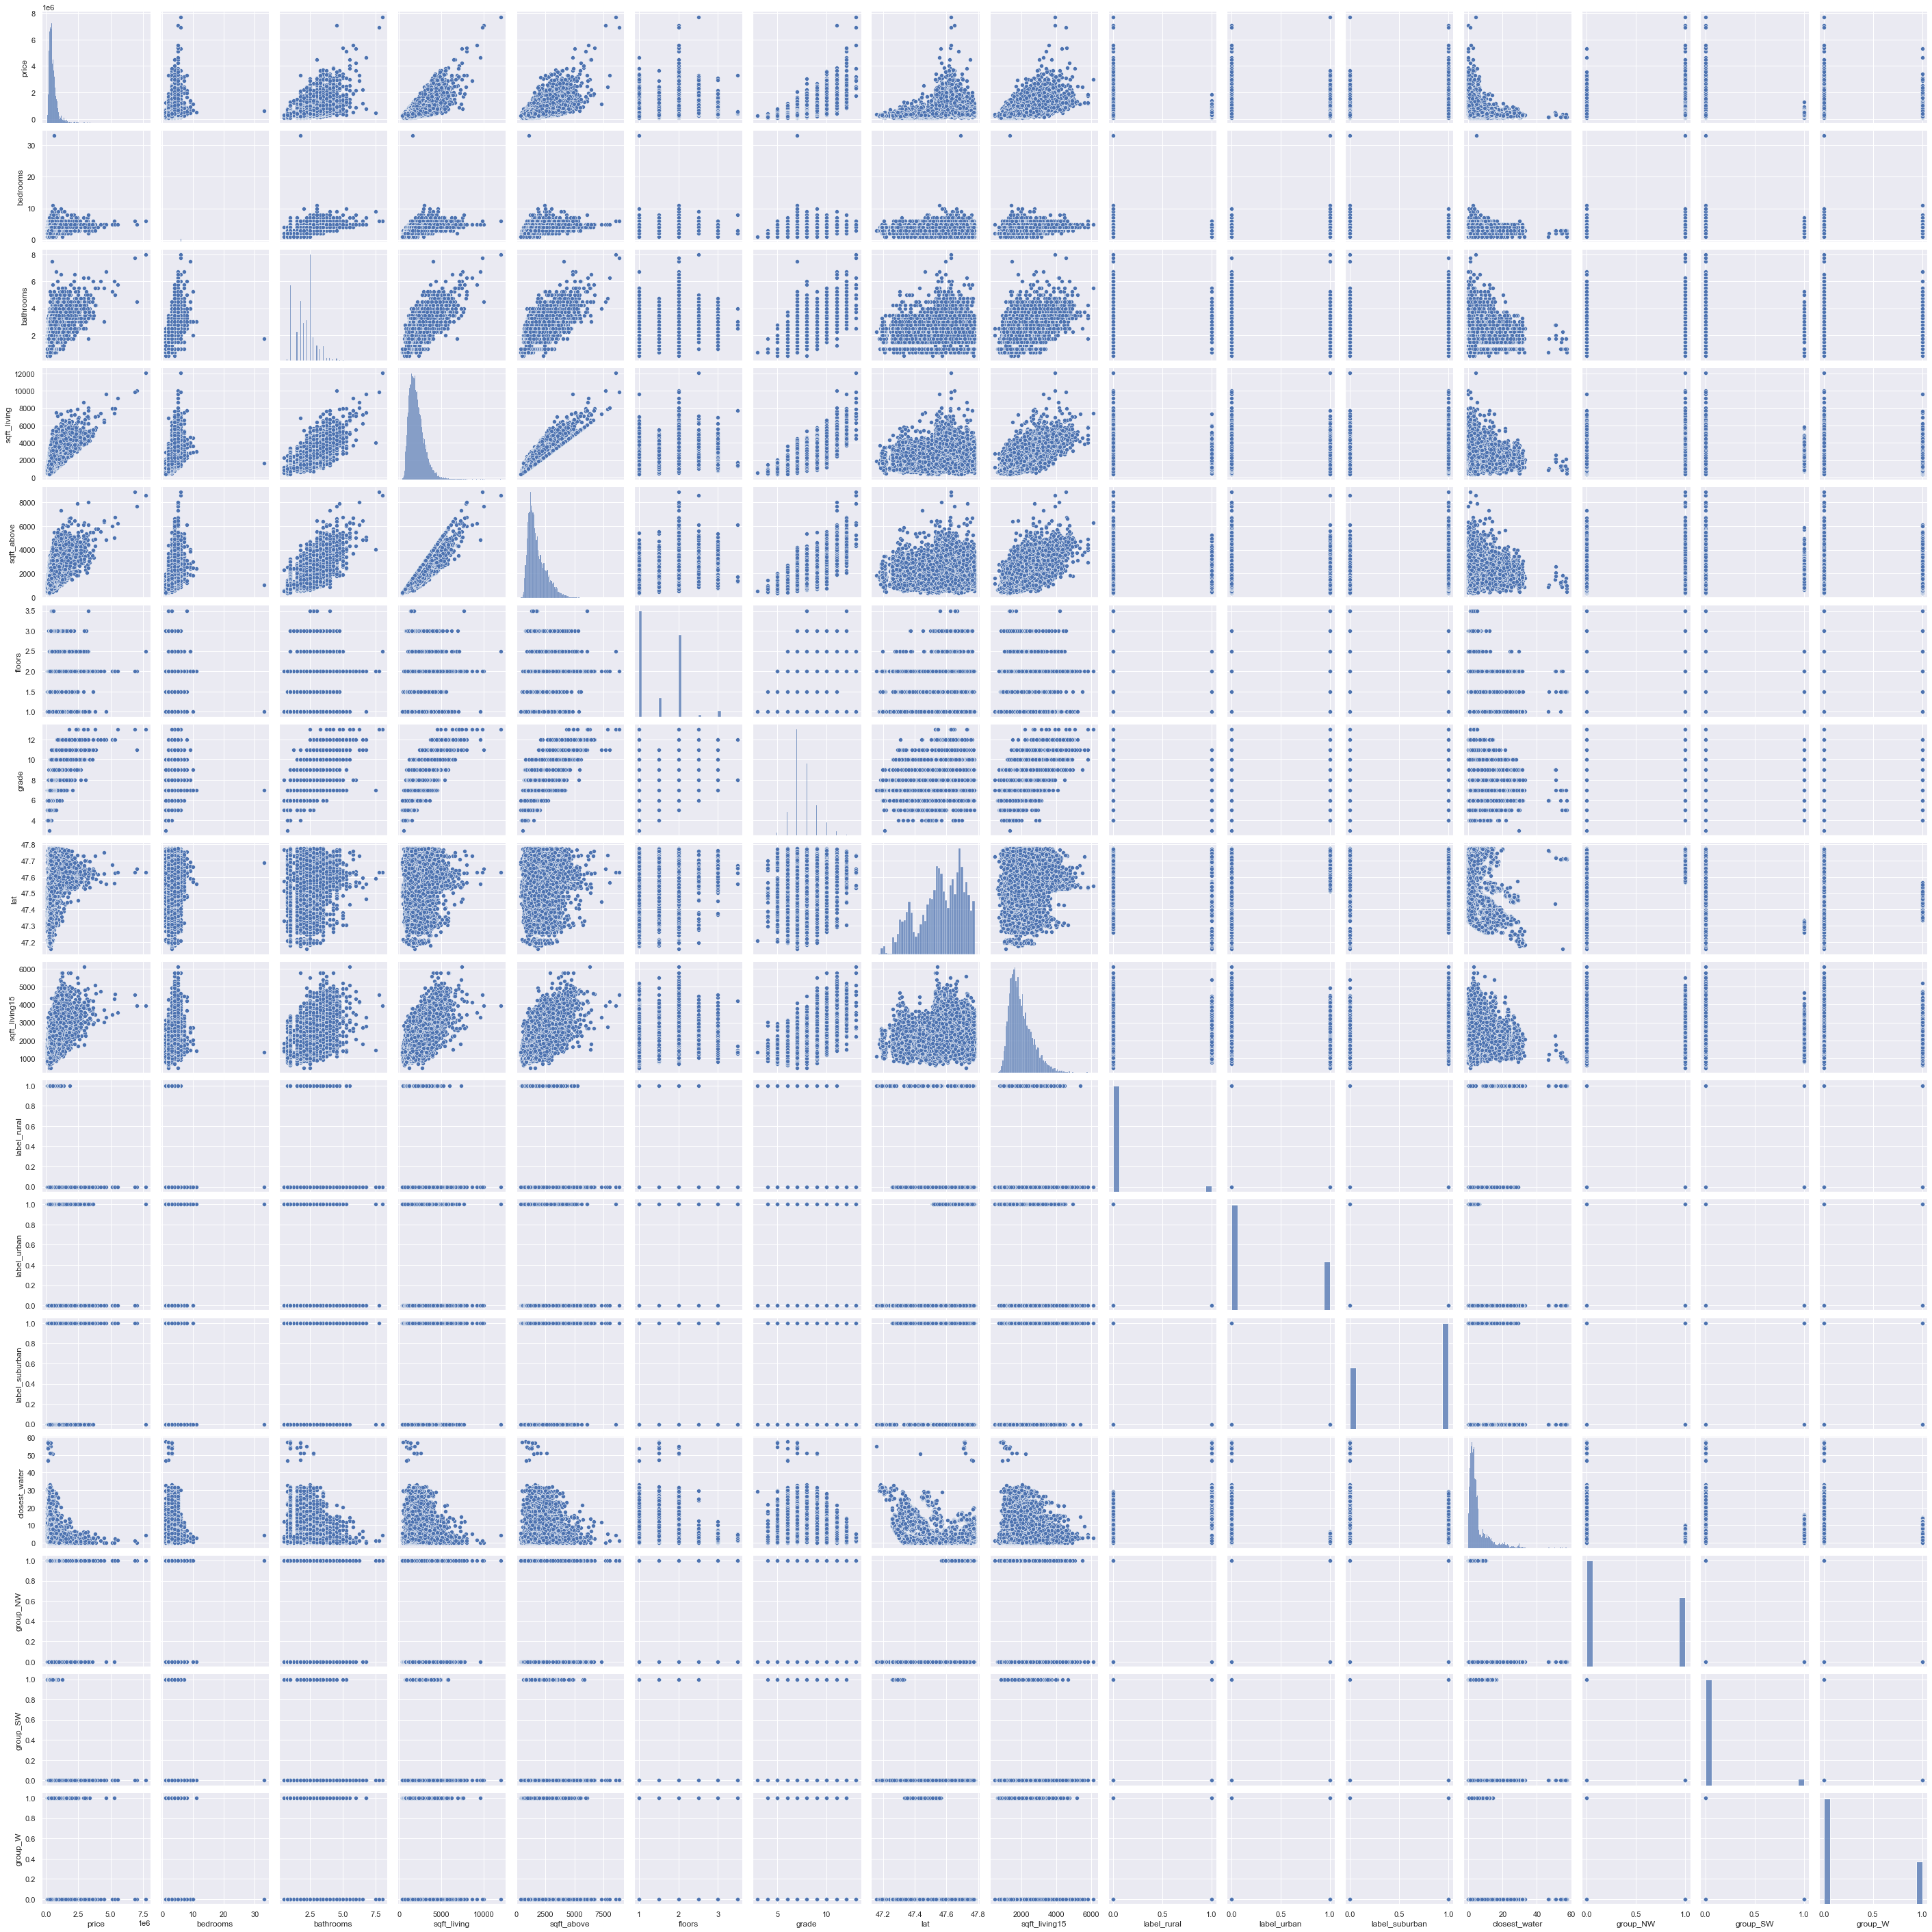

In [11]:
#passing the list into the pairplot
sns.pairplot(df[metrics_list])

# Testing Assumptions

In [12]:
#This section we test our assumptions?

# Creating our first model
### splitting our train and test data 8:2 ratio

In [13]:
y = df.price
X = df[metrics_list].drop('price', axis=1) # dropped yr_renovated because of its null values

#Creating our test split. 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=33)

# Creating our dummy regression baseline model using mean price

In [14]:
#Dummy Regressor

dummy_regr = DummyRegressor(strategy = 'mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train) # looks at our predictions

array([538487.51118894, 538487.51118894, 538487.51118894, ...,
       538487.51118894, 538487.51118894, 538487.51118894])

notice the above predictions of our price from our training data. All the predictions are the same, i.e. the mean price in this sample 
### Scoring to get R-squared

In [15]:
#scoring our baseline model 
dummy_regr.score(X_train, y_train)

0.0

This R-squared of 0 means that 0% of the variation in price is explained by this baseline model. We can do better:

### Scaling our Train data

In [16]:
ss = StandardScaler() # instatiate scaler object
ss.fit(X_train) # Fit it to train
X_preds_st_scaled = ss.transform(X_train) #transforming and saving it as a scaled train data object

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

### fitting it to our linear regression and 

In [1]:
lr = LinearRegression()
lr.fit(X_preds_st_scaled, y_train)
lr.coef_
# lr.score(X_preds_st_scaled, y_train)

NameError: name 'LinearRegression' is not defined

above R-squared says that our model predicts 66.6% of the variation in home prices of our training data, now we see how it does on new data (our test)

### trying the model on our test data

In [15]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
lr.score(X_test_scaled, y_test)

0.6612405507690351

This works well. However, we used many different metrics for this model, which is likely too complex and impacted by multicolinearity
We examine in more detail using stats models

## Examining our first model

In order to get a more complete summary we use statsmodels, but first we need to manipulate our train data to the right format

In [15]:
#Reassembling our dataframe using scaled X values
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = df[metrics_list].drop('price', axis=1).columns
y_train.reset_index(drop=True,inplace=True)
X_train_scaled_final = pd.concat((X_train_scaled,y_train),axis=1)



In [17]:
#running the same model to get a detailed summary
outcome = 'price'
x_cols = df[metrics_list].drop('price', axis=1)
predictors = '+'.join(x_cols)
formula = 'price' + '~' + predictors
model2 = ols(formula=formula, data=X_train_scaled_final)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2394.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:08:38   Log-Likelihood:            -2.3039e+05
No. Observations:               16847   AIC:                         4.608e+05
Df Residuals:                   16832   BIC:                         4.609e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.385e+05   1621.662    332.059      0.000    5.35e+05    5.42e+05
bedrooms       -3.562e+04   2067.229    -17.231      0.000   -3.97e+04   -3.16e+04
bathrooms       8654.7362   2793.343      3.098      0.002    3179.491    1.41e+04
sqft_living     1.624e+05   4649.653     34.937      0.000    1.53e+05    1.72e+05
sqft_above      3.497e+04   4263.661      8.202      0.000    2.66e+04    4.33e+04
floors           -3.7e+04   2298.792    -16.094      0.000   -4.15e+04   -3.25e+04
grade           8.812e+04   2932.962     30.045      0.000    8.24e+04    9.39e+04
lat            -3.063e+04   3108.108     -9.854      0.000   -3.67e+04   -2.45e+04
sqft_living15   3.572e+04   2773.670     12.877      0.000    3.03e+04    4.12e+04
label_rural     8395.1734   1824.733      4.601      0.000    4818.505     1.2e+04
label_urban     2.054e+04   1274.238     16.120      0.000     1.8e+04     2.3e+04
label_suburban -2.368e+04   1047.709    -22.606      0.000   -2.57e+04   -2.16e+04
closest_water  -6.872e+04   2626.568    -26.164      0.000   -7.39e+04   -6.36e+04
group_NW        6.751e+04   2780.887     24.278      0.000    6.21e+04     7.3e+04
group_SW        -4.78e+04   2330.170    -20.511      0.000   -5.24e+04   -4.32e+04
group_W        -3.645e+04   2750.068    -13.256      0.000   -4.18e+04   -3.11e+04
==============================================================================
Omnibus:                    13965.109   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           874464.478
Skew:                           3.586   Prob(JB):                         0.00
Kurtosis:                      37.559   Cond. No.                     3.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [22]:
print(vif_data)

           feature            VIF
0         bedrooms       1.633034
1        bathrooms       2.956197
2      sqft_living       8.195724
3       sqft_above       6.871553
4           floors       2.008205
5            grade       3.272725
6              lat       3.646009
7    sqft_living15       2.939784
8      label_rural   22765.263108
9      label_urban  138583.768102
10  label_suburban  276169.370418
11   closest_water       2.582491
12        group_NW       2.927430
13        group_SW       2.071140
14         group_W       2.859481


When assessing the VIF of each feature, we realize that label_rural, label_urban, and label_suburban have extremely high values. Since the VIFs for these aforementioned variables are way higher than 10, we can see that there is high multicollinearity. Thus, we decided to remove these features.

# Second Model

In [26]:
# defining the metrics used for our second model
metrics_list2 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'floors', 'grade', 'lat',
              'sqft_living15', 'closest_water',
                'group_NW','group_SW','group_W']

In [27]:
y2 = df.price
X2 = df[metrics_list2].drop('price', axis=1) # dropped yr_renovated because of its null values

#Creating our test split. 80% train, 20% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    y2,
                                                    test_size=0.2,
                                                    random_state=33)

In [28]:
ss2 = StandardScaler() # instatiate scaler object
ss2.fit(X_train2) # Fit it to train
X_preds_st_scaled2 = ss2.transform(X_train2) #transforming and saving it as a scaled train data object

X_train_scaled2 = ss2.transform(X_train2)
X_test_scaled2 = ss2.transform(X_test2)

lr2 = LinearRegression()
lr2.fit(X_preds_st_scaled2, y_train2)
lr2.coef_
lr2.score(X_preds_st_scaled2, y_train2)

0.6555479164587934

In [30]:
#Reassembling our dataframe using scaled X values
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_train_scaled2.columns = df[metrics_list2].drop('price', axis=1).columns
y_train2.reset_index(drop=True,inplace=True)
X_train_scaled_final2 = pd.concat((X_train_scaled2,y_train2),axis=1)

In [31]:
#running a second model, removing label_rural, label_urban, and label_suburban
outcome2 = 'price'
x_cols2 = df[metrics_list2].drop('price', axis=1).columns
predictors2 = '+'.join(x_cols2)
formula2 = 'price' + '~' + predictors2
model2 = ols(formula=formula2, data=X_train_scaled_final2)
results2 = model2.fit()
results2.summary() # returns a more detailed summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2670.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:18:22   Log-Likelihood:            -2.3065e+05
No. Observations:               16847   AIC:                         4.613e+05
Df Residuals:                   16834   BIC:                         4.614e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.385e+05   1646.022    327.145      0.000    5.35e+05    5.42e+05
bedrooms      -3.917e+04   2092.163    -18.721      0.000   -4.33e+04   -3.51e+04
bathrooms      3819.3958   2825.721      1.352      0.177   -1719.314    9358.106
sqft_living    1.797e+05   4653.150     38.623      0.000    1.71e+05    1.89e+05
sqft_above     1.513e+04   4220.495      3.586      0.000    6861.326    2.34e+04
floors        -2.477e+04   2254.236    -10.989      0.000   -2.92e+04   -2.04e+04
grade          8.992e+04   2970.606     30.270      0.000    8.41e+04    9.57e+04
lat           -2.329e+04   3110.407     -7.488      0.000   -2.94e+04   -1.72e+04
sqft_living15  2.559e+04   2771.023      9.236      0.000    2.02e+04     3.1e+04
closest_water -6.023e+04   2388.858    -25.213      0.000   -6.49e+04   -5.55e+04
group_NW       8.357e+04   2630.220     31.774      0.000    7.84e+04    8.87e+04
group_SW      -4.862e+04   2364.878    -20.560      0.000   -5.33e+04    -4.4e+04
group_W       -3.007e+04   2773.548    -10.840      0.000   -3.55e+04   -2.46e+04
==============================================================================
Omnibus:                    13581.587   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           782380.151
Skew:                           3.456   Prob(JB):                         0.00
Kurtosis:                      35.662   Cond. No.                         7.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our second model, we can observe that the p-value for bathrooms is higher than the alpha, 0.05, meaning that a change in the  number of bathrooms does not have a statistically significant impact on the price. Thus, we decided the remove the bathroom feature from our model.

<AxesSubplot:>

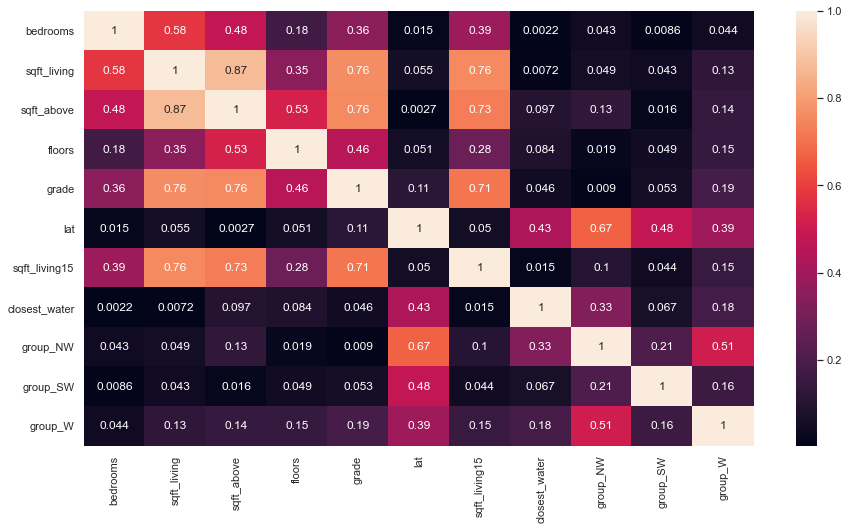

In [21]:
sns.heatmap(X_train_scaled.filter(['bedrooms', 'sqft_living', 'sqft_above', 'floors', 'grade', 'lat',
                'sqft_living15', 'closest_water',
                'group_NW','group_SW','group_W'],axis=1).corr().abs(),annot=True)

In order to check for multicolinearity, we conducted a heatmap with all of the features in the model. The correlation between sqft_living and sqft_above was very high at 0.87. This was foreseeable since the metric on sqft_living already includes sqft_above. Sqft_living also had a high correlation of 0.76 with grade and 0.73 with sqft_living15. We decided to retain sqft_living instead of sqft_above, grade, and sqft_living15 because it had the highest coefficient in relation to the price.

However, intuitively grade seems to be a great indicator for the quality of a house. Thus, we decided to take a closer look at the grade and how it affects the price after completing our model.

# Third Model

In [34]:
metrics_list3 = ['price', 'bedrooms', 'sqft_living', 'floors', 'lat','closest_water', 'group_NW','group_SW','group_W']

In [35]:
y3 = df.price
X3 = df[metrics_list3].drop('price', axis=1) 

#Creating our test split. 80% train, 20% test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, 
                                                    y3,
                                                    test_size=0.2,
                                                    random_state=33)

In [36]:
ss3 = StandardScaler() # instatiate scaler object
ss3.fit(X_train3) # Fit it to train
X_preds_st_scaled3 = ss3.transform(X_train3) #transforming and saving it as a scaled train data object

X_train_scaled3 = ss3.transform(X_train3)
X_test_scaled3 = ss3.transform(X_test3)

#getting r-sqaured with sklearn for our train data
lr3 = LinearRegression()
lr3.fit(X_preds_st_scaled3, y_train3)
lr3.coef_
lr3.score(X_preds_st_scaled3, y_train3)

0.6259777806026976

In [37]:
#getting r-sqaured with sklearn for our test data
X_train_scaled3 = ss3.transform(X_train3)
X_test_scaled3 = ss3.transform(X_test3)
lr3.score(X_test_scaled3, y_test3)

0.6411706098467951

In [38]:
#Reassembling our dataframe using scaled X values
X_train_scaled3 = pd.DataFrame(X_train_scaled3)
X_train_scaled3.columns = df[metrics_list3].drop('price', axis=1).columns
y_train3.reset_index(drop=True,inplace=True)
X_train_scaled_final3 = pd.concat((X_train_scaled3,y_train3),axis=1)

In [39]:
outcome3 = 'price'
x_cols3 = df[metrics_list3].drop('price', axis=1).columns
predictors3 = '+'.join(x_cols3)
formula3 = 'price' + '~' + predictors3
model3 = ols(formula=formula3, data=X_train_scaled_final3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     3523.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:22:32   Log-Likelihood:            -2.3134e+05
No. Observations:               16847   AIC:                         4.627e+05
Df Residuals:                   16838   BIC:                         4.628e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.385e+05   1715.017    313.984      0.000    5.35e+05    5.42e+05
bedrooms      -5.127e+04   2113.396    -24.259      0.000   -5.54e+04   -4.71e+04
sqft_living    2.792e+05   2270.533    122.954      0.000    2.75e+05    2.84e+05
floors        -1294.1268   1853.165     -0.698      0.485   -4926.524    2338.270
lat            -2.48e+04   3234.627     -7.667      0.000   -3.11e+04   -1.85e+04
closest_water -7.172e+04   2447.619    -29.300      0.000   -7.65e+04   -6.69e+04
group_NW       7.002e+04   2638.619     26.536      0.000    6.48e+04    7.52e+04
group_SW      -5.504e+04   2450.902    -22.459      0.000   -5.98e+04   -5.02e+04
group_W       -4.861e+04   2828.047    -17.188      0.000   -5.42e+04   -4.31e+04
==============================================================================
Omnibus:                    12396.424   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           528599.019
Skew:                           3.088   Prob(JB):                         0.00
Kurtosis:                      29.737   Cond. No.                         4.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The feature floors has a p_value of 0.485, which is way higher than the alpha, 0.05. This mean that a change in the number of floors does not have a statistically significant influence on the price. Thus, we decided to remove floors in our model.

# Fourth Model

Since the closest to water metric does not have a normal distribution, we decided to apply a logarithm. This makes intuitive sense, because distance to water has a exponentially bigger significance on price as it gets closer.

In [43]:
df['log_water'] = np.log(df['closest_water'] + 0.001)

In [44]:
metrics_list4 = ['price', 'bedrooms', 'sqft_living', 'lat','log_water', 'group_NW','group_SW','group_W']

In [46]:

y4 = df.price
X4 = df[metrics_list4].drop('price', axis=1) # 

#Creating our test split. 80% train, 20% test
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4,test_size=0.2, random_state=33)

ss4 = StandardScaler() # instatiate scaler object
ss4.fit(X_train4) # Fit it to train
X_preds_st_scaled4 = ss4.transform(X_train4) #transforming and saving it as a scaled train data object

X_train_scaled4 = ss4.transform(X_train4)
X_test_scaled4 = ss4.transform(X_test4)

#sklearn model our train
lr4 = LinearRegression()
lr4.fit(X_preds_st_scaled4, y_train4)
lr4.coef_
lr4.score(X_preds_st_scaled4, y_train4), lr4.score(X_test_scaled4, y_test4)

(0.6572955404890684, 0.6669559555375211)

In [47]:
#Reassembling our dataframe using scaled X values
X_train_scaled4 = pd.DataFrame(X_train_scaled4)
X_train_scaled4.columns = df[metrics_list4].drop('price', axis=1).columns
y_train4.reset_index(drop=True,inplace=True)
X_train_scaled_final4 = pd.concat((X_train_scaled4,y_train4),axis=1)

In [48]:
#running a fourth model, removing  sqft_above, grade, and sqft_living15
outcome4 = 'price'
x_cols4 = df[metrics_list4].drop('price', axis=1).columns
predictors4 = '+'.join(x_cols4)
formula4 = 'price' + '~' + predictors4
model4 = ols(formula=formula4, data=X_train_scaled_final4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     4614.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:30:51   Log-Likelihood:            -2.3060e+05
No. Observations:               16847   AIC:                         4.612e+05
Df Residuals:                   16839   BIC:                         4.613e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.385e+05   1641.598    328.027      0.000    5.35e+05    5.42e+05
bedrooms    -4.485e+04   2026.039    -22.135      0.000   -4.88e+04   -4.09e+04
sqft_living  2.682e+05   2094.963    128.006      0.000    2.64e+05    2.72e+05
lat         -9984.4988   2713.221     -3.680      0.000   -1.53e+04   -4666.302
log_water   -9.292e+04   1865.321    -49.813      0.000   -9.66e+04   -8.93e+04
group_NW     7.105e+04   2453.833     28.955      0.000    6.62e+04    7.59e+04
group_SW     -4.22e+04   2124.021    -19.866      0.000   -4.64e+04    -3.8e+04
group_W     -4.508e+04   2335.462    -19.303      0.000   -4.97e+04   -4.05e+04
==============================================================================
Omnibus:                    11327.274   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           448053.190
Skew:                           2.709   Prob(JB):                         0.00
Kurtosis:                      27.677   Cond. No.                         3.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Reassembling our dataframe using scaled X values
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = df[metrics_list].drop('price', axis=1).columns
y_test.reset_index(drop=True,inplace=True)
X_test_scaled_final = pd.concat((X_test_scaled,y_test),axis=1)
X_test_scaled_final

,bedrooms,bathrooms,sqft_living,sqft_above,floors,grade,lat,sqft_living15,label_rural,label_urban,label_suburban,closest_water,group_NW,group_SW,group_W,price
0,0.668172,0.501111,0.122484,0.489489,0.93053,0.297049,-1.406608,0.798426,-0.236027,-0.680290,0.764953,2.300023,-0.806657,-0.255186,-0.634440,363000
1,-1.478003,-1.460673,-0.676551,-0.638320,-0.91813,-0.562664,1.015308,-0.587041,-0.236027,1.469962,-1.307271,-0.384172,1.239684,-0.255186,-0.634440,312000
2,-0.404916,0.501111,-0.376913,-0.062157,0.93053,0.297049,0.194209,-0.365956,-0.236027,-0.680290,0.764953,-0.341811,1.239684,-0.255186,-0.634440,596000
3,-1.478003,-1.460673,-0.920701,-1.030601,-0.91813,-0.562664,-0.543401,-1.368209,-0.236027,-0.680290,0.764953,-0.440394,-0.806657,-0.255186,1.576193,170000
4,0.668172,0.501111,1.665064,2.193460,0.93053,1.156763,1.047252,2.390240,-0.236027,-0.680290,0.764953,0.240703,-0.806657,-0.255186,-0.634440,928990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.668172,0.501111,0.233461,0.612077,0.93053,-0.562664,-0.359724,0.444690,-0.236027,-0.680290,0.764953,-0.714668,-0.806657,-0.255186,1.576193,433000
4208,-0.404916,-0.806745,0.022604,0.011396,-0.91813,-0.562664,-0.180404,0.297300,-0.236027,1.469962,-1.307271,-0.884432,-0.806657,-0.255186,1.576193,461550
4209,0.668172,0.501111,0.300047,0.685629,0.93053,1.156763,0.488237,0.533124,-0.236027,-0.680290,0.764953,-0.348414,-0.806657,-0.255186,-0.634440,645000
4210,-0.404916,-1.460673,-0.743137,-0.466697,0.00620,-0.562664,0.774278,-0.351217,-0.236027,1.469962,-1.307271,-0.146503,1.239684,-0.255186,-0.634440,887200


# FINAL MODEL

In [53]:
metrics_list5 = ['price', 'sqft_living', 'log_water', 'group_NW','group_SW','group_W']

In [91]:
y5 = df.price
X5 = df[metrics_list5].drop('price', axis=1) # 

#Creating our test split. 80% train, 20% test
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5,test_size=0.2, random_state=33)

ss5 = StandardScaler() # instatiate scaler object
ss5.fit(X_train5) # Fit it to train
X_preds_st_scaled5 = ss5.transform(X_train5) #transforming and saving it as a scaled train data object

X_train_scaled5 = ss5.transform(X_train5)
X_test_scaled5 = ss5.transform(X_test5)

#sklearn model our train
lr5 = LinearRegression()
lr5.fit(X_preds_st_scaled5, y_train5)
lr5.coef_
final_scores = lr5.score(X_preds_st_scaled5, y_train5), lr5.score(X_test_scaled5, y_test5)
print(final_scores)

(0.6471142296202493, 0.6565907026439548)


In [92]:
#Reassembling our dataframe using scaled X values
X_train_scaled5 = pd.DataFrame(X_train_scaled5)
X_train_scaled5.columns = df[metrics_list5].drop('price', axis=1).columns
y_train5.reset_index(drop=True,inplace=True)
X_train_scaled_final5 = pd.concat((X_train_scaled5,y_train5),axis=1)

In [99]:
outcome5 = 'price'
x_cols5 = df[metrics_list5].drop('price', axis=1).columns
predictors5 = '+'.join(x_cols5)
formula5 = 'price' + '~' + predictors5
model5 = ols(formula=formula5, data=X_train_scaled_final5)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6177.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:07:16   Log-Likelihood:            -2.3085e+05
No. Observations:               16847   AIC:                         4.617e+05
Df Residuals:                   16841   BIC:                         4.618e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.385e+05   1665.705    323.279      0.000    5.35e+05    5.42e+05
sqft_living  2.412e+05   1730.884    139.356      0.000    2.38e+05    2.45e+05
log_water   -9.396e+04   1819.255    -51.645      0.000   -9.75e+04   -9.04e+04
group_NW     6.485e+04   2225.385     29.143      0.000    6.05e+04    6.92e+04
group_SW     -4.02e+04   1810.543    -22.205      0.000   -4.38e+04   -3.67e+04
group_W     -4.568e+04   2229.136    -20.491      0.000      -5e+04   -4.13e+04
==============================================================================
Omnibus:                    11620.441   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           485443.870
Skew:                           2.798   Prob(JB):                         0.00
Kurtosis:                      28.695   Cond. No.                         2.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
final_model = results5

In [94]:
X_test_scaled5 = pd.DataFrame(X_test_scaled5)
X_test_scaled5.columns = df[metrics_list5].drop('price', axis=1).columns
y_test5.reset_index(drop=True,inplace=True)
X_test_scaled_final5 = pd.concat((X_test_scaled5,y_test5),axis=1)
X_test_scaled_final5.head(2)

,sqft_living,log_water,group_NW,group_SW,group_W,price
0,0.122484,1.472066,-0.806657,-0.255186,-0.63444,363000
1,-0.676551,-0.021548,1.239684,-0.255186,-0.63444,312000


# R2 Test Data

In [101]:
from sklearn.metrics import r2_score

In [107]:
#Reassembling our dataframe using scaled X values
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = df[metrics_list].drop('price', axis=1).columns
y_test.reset_index(drop=True,inplace=True)
X_test_scaled_final = pd.concat((X_test_scaled,y_test),axis=1)
X_test_scaled_final.head(2)

,bedrooms,bathrooms,sqft_living,sqft_above,floors,grade,lat,sqft_living15,label_rural,label_urban,label_suburban,closest_water,group_NW,group_SW,group_W,price
0,0.668172,0.501111,0.122484,0.489489,0.93053,0.297049,-1.406608,0.798426,-0.236027,-0.680290,0.764953,2.300023,-0.806657,-0.255186,-0.63444,363000
1,-1.478003,-1.460673,-0.676551,-0.638320,-0.91813,-0.562664,1.015308,-0.587041,-0.236027,1.469962,-1.307271,-0.384172,1.239684,-0.255186,-0.63444,312000


In [114]:
# Comparing R2 of model with test data

y_test_pred = final_model.predict(X_test_scaled_final5)
print('R2 of Model with Test Data:',round(r2_score(y_test5,y_test_pred),3))
print('R2 of Model with Train Data:',round(final_model.rsquared,3))

R2 of Model with Test Data: 0.657
R2 of Model with Train Data: 0.647


## RSME

In [103]:
from statsmodels.tools.eval_measures import rmse

In [113]:
y_hat_train = final_model.predict(X_train_scaled5)
print('Train RMSE:',rmse(y_train5,y_hat_train))
print('Test RMSE:',rmse(y_test5,y_test_pred))
print('Difference in RSME:', abs(rmse(y_train5,y_hat_train)-rmse(y_test5,y_test_pred)))

Train RMSE: 216163.3387019785
Test RMSE: 224770.1879454908
Difference in RSME: 8606.84924351229


## Normal Distribution of Residuals

In [116]:
from statsmodels.api import qqplot

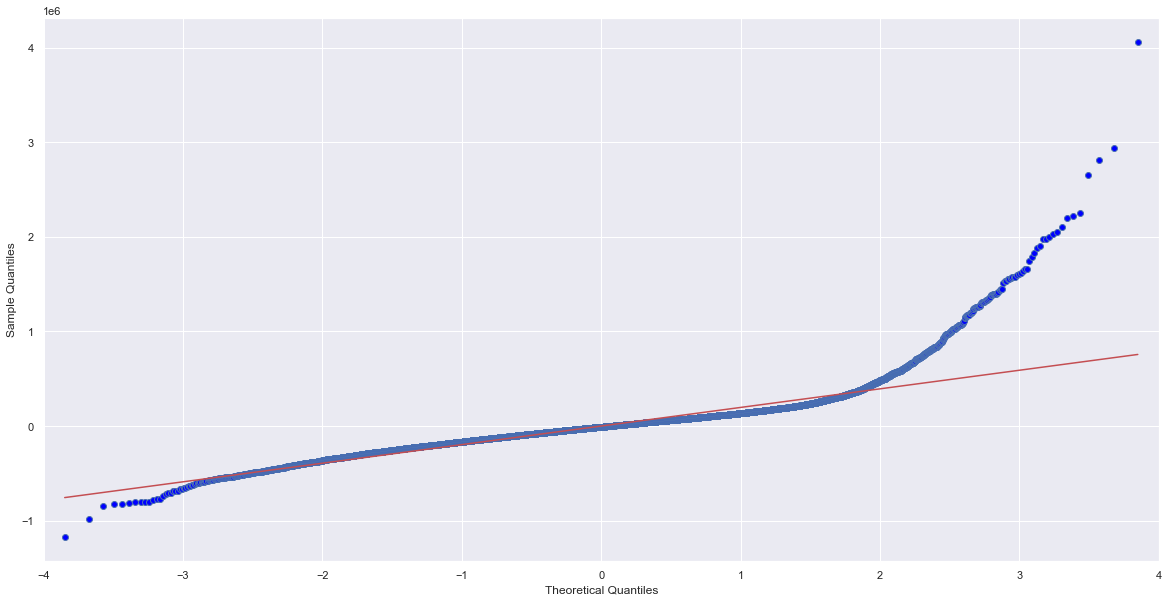

In [123]:
qqplot(y_train-y_hat_train,line='r')
plt.show()

## Heteroskedasticity and Lack of Trend in Errors

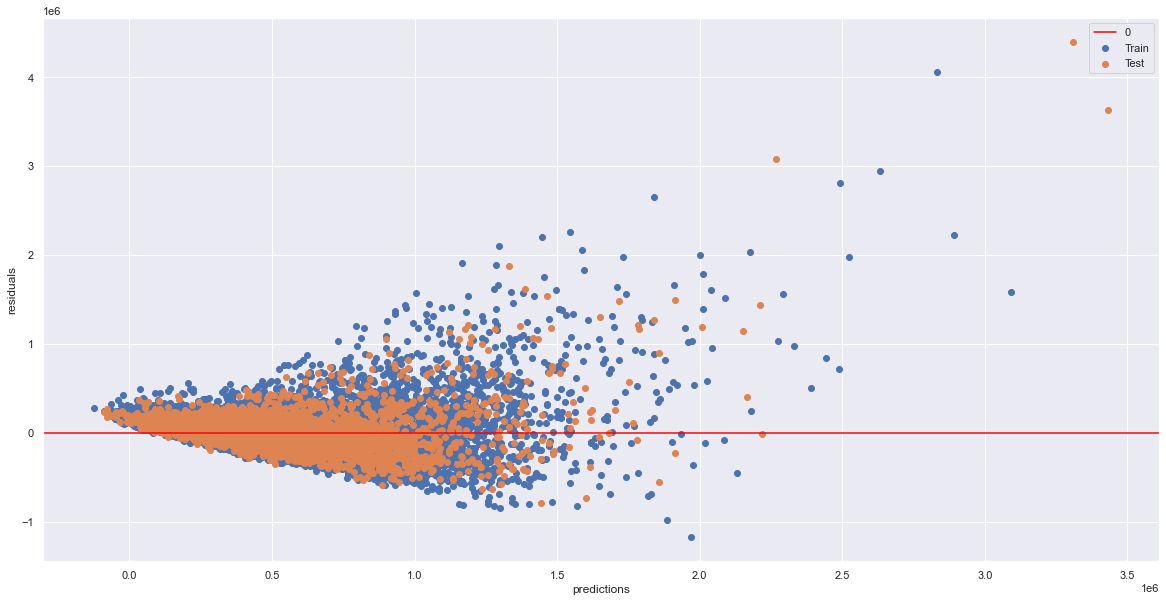

In [124]:


plt.scatter(y_hat_train, y_train - y_hat_train, label='Train')
plt.scatter(y_test_pred, y_test - y_test_pred, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

# Multicolinearity

<AxesSubplot:>

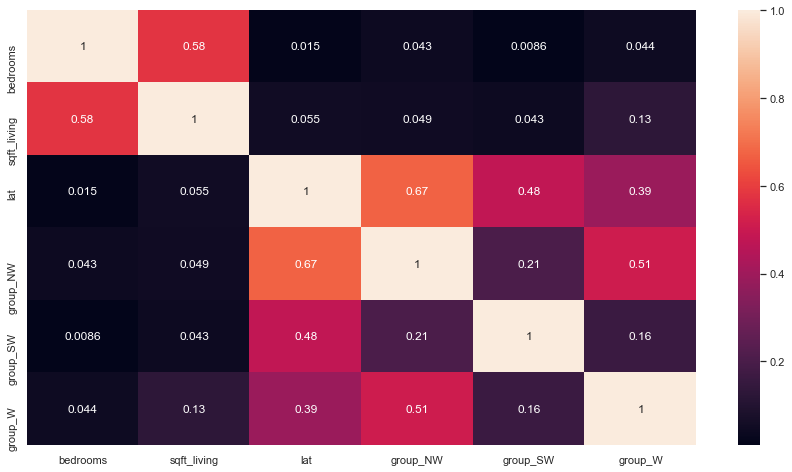

In [42]:
sns.heatmap(X_train_scaled.filter(['bedrooms', 'sqft_living', 'lat','log_water', 'group_NW','group_SW','group_W'],axis=1).corr().abs(),annot=True)

# OLS Regression Model for Test

In [ ]:
#Reassembling our dataframe using scaled X values
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = df[metrics_list].drop('price', axis=1).columns
y_test.reset_index(drop=True,inplace=True)
X_test_scaled_final = pd.concat((X_test_scaled,y_test),axis=1)
X_test_scaled_final

In [ ]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'floors', 'grade', 'lat',
                'sqft_living15', 'sqft_lot15', 'label_rural', 'label_urban', 'label_suburban', 'closest_water',
                'group_NW','group_SW','group_W']
predictors = '+'.join(x_cols)
formula = 'price' + '~' + predictors
model_test = ols(formula=formula, data=X_test_scaled_final)
results = model_test
results.summary()

By assessing the OLS Regression Results of the test, we can see that sqft_lot15, label_rural, and bathrooms have a higher p-value than the alpha, which is 0.05. This suggests that the aforementioned features do not significantly influence the dependent variable, price. Thus, we eliminated the aforementioned features from our linear regression model.

In [ ]:
#Multicolinearity
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(df.drop('id', axis=1).corr().abs(), annot=True);

In [ ]:
# Exploring correlation and linearity in our dataset with a HEATMAP
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(df.drop('id', axis=1).corr().abs(), annot=True);

In [ ]:
#IGNORE BELOW

In [ ]:
df_not_water = df.loc[df['waterfront'] != 'YES']
df_not_water.shape

In [ ]:
sns.scatterplot(1/df_not_water['closest_water'], df_not_water['price'])

In [ ]:
df2 = df[df['closest_water'] != 0].copy()

In [ ]:
sns.histplot(np.log(1/df2['closest_water']))

In [ ]:
sns.histplot(np.log(df2['closest_water']))

In [ ]:
df2['price'].corr(np.log(df2['closest_water']))

In [ ]:
len(df2)

In [ ]:
sns.scatterplot(df2['price'],np.log(df2['closest_water']))

In [ ]:
df3 = pd.read_csv("master_data_2.csv")